# Условия задачи

Существует интернет магазин, продающий самые разные товары для повседневной жизни и электронику. Одними из основных KPI магазина руководство обозначило выручку и аудиторию. Менеджер, ответственный за проект, направляет значительные средства на рекламу интернет магазина на различных каналах и привлечение как можно большего числа пользователей.<p>
Две недели назад оказалось, что несмотря на постоянно растущую аудиторию магазина (MAU), суммарная выручка упала. Менеджер объясняет это началом отпускного сезона. <p>__Руководство магазино поручило вам проверить теорию менеджера и дать более точный отчет по причинам падения выручки, а также сформулировать рекомендации по ее увеличению, если такие возможности существуют.__<p>

# Описание данных

Данные, доступные для анализа: агрегированные логи действий пользователей на сайте в json формате (считаем, что все поля в логе посчитаны корректно)<br>
{'date':'%Y-%m-%d %H-%M-%S %Z',<br>
 'action': [тип действия пользователя на сайте],<br>
 'cid': кука пользователя,<br>
 'browser': тип браузера пользователя,<br>
 'browser_version': версия браузера пользователя,<br>
 'platform': тип устройства пользователя[desktop, android, ios, unknown],<br>
 'channel': канал привлечения пользователя,<br>
 'sum': сумма покупки, если тип действия == 'make_order'}<p>
 
 Типы действий пользователя:<br>
 open - просмотр главной страницы сайта. Все сессии работы сайта начинаются с просмотра главной страницы<br>
 search - поиск товаров через внутреннюю поисковую систему<br>
 product_view - просмотр карточки товара<br>
	Дополнительные поля: product_id: - id продукта, product_priсe - стоимость продукта<br>
 add_to_cart - добавление товара в корзину<br>
	Дополнительные поля: product_id - id продукта, product_priсe- стоимость продукта, items_count - кол-во продуктов<br>
 make_order - совершение заказа<br>


Алгоритм рассчета KPI: MAU - кол-во уникальных посетителей в логах (по cid) за последние 30 дней,<br>
						выручка - сумма всех значений cost в событии make_order за последние 30 дней

### План исследования:

1) Проверка качества данных и первичный разведывательный анализ

2) Описание причин падения выручки на основе предложенного набора данных

    2.1) Генерация гипотез, выделение из них возможных для проверки
    
    2.2) Проверка гипотез (в том числе, проверка гипотезы менеджера: падение выручки связано с сезонным фактором)

3) Рекомендации по увеличению выручки на основе проверенных гипотез


### До исследования данных предложу гипотезы для проверки задачи: Почему выручка снижается при росте количества пользователей?

UPD: после исследования данных, большинство гипотез стали неактуальны


#### Которые можно проверить на основе имеющихся данных:

A. Новый партнер генерит много новых пользователей, но a) им не заходит платформа, они не хотят покупать (неверно подбрана ЦА канала - плохой метч с ЦА интернет-магазина) b) они слишком новые, им нужно больше времени, чтобы решиться на покупку. На данных: есть парнер, доля платящих пользователей по которому очень низкая

B. У интернет-магазина много новых пользователей (например, их нагенерила новая маркетинговая активность), но если анализировать только старых пользователей, 
то на самом деле лояльных пользователей, которые приносили основную часть выручки, стало меньше. На данных: посмотреть динамику новых пользователей; проверить retention, например, помесячный

C. Стало неудобно пользоваться сайтом, первая страница при заходе стала непривлекательной, что привело к снижению количества покупок. На данных: посмотреть процент отказов (процент пользователей с только действием open), посмотреть как менялись конверсия в воронке со временем 

D. На сайте что-то сломалось, например, прием платежей или верстка первой страницы сайта, из-за новой версии браузера или обновления ОС. На данных: показатели (например, доля платящих пользователей или конверсии в воронке) будут отличаться в зависимости от типа устройства/версии браузера.


#### Которые останутся за рамками данного анализа, так как недостаточно данных, чтобы это проверить:


E. Произошли другие внутренние изменения в продукте: изменился вид главной страницы, поменяли систему рекомендаций, иначе формируется поисковая выдача, стало проще установить фильтр/соритировку по цене, расположение корзины, изменение способов оплаты и другое

F. Произошло внешнее изменение: старый игрок (прямой конкурент) изменил ценовую политику на политику более низких цен. А пользователи обоих интернет магазинов (нашего и конкурента; свитчеры) уже привыкли сравнивать цены между ними, в связи с чем заходят на наш сайт для просмотра цен, но делают покупки у конкурента, так как цены на аналогичные товары ниже.

G. Крупный селлер (или несколько крупных брендов) приостановили сотрудничество с этим интернет-магазином. То есть пользователи имели возможность покупать (дорогие?) товары конкретного крупного бренда, но теперь этой части их трат нет, но они заходят и покупают другие (более дешевые?) товары

H. Произошла внешняя ситуация из-за которой средний чек снизился. то есть наши маркетинговые компании работают и привлекают аудиторию, но платежная способность населения в целом снизилась. Либо средний чек в каком-то конкретном сегменте снизился.

I. Произошли изменения в ценовой политике селлеров, или самого интернет-магазина (в том числе увеличение затрат селлеров за счет комиссии и других сборов, которые в итоге перекадываются на покупателя). Они оказались неоптимальными с точки зрения рынка, завышенными.


#### Безусловно, это не все возможные гипотезы, но протестируем некоторые из них на основе доступных данных

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка файла из csv

data = pd.read_csv('C:/Users/Maria/Downloads/test_data.csv', parse_dates=['date'])

In [3]:
data.head()

,platform,cid,action,browser_version,date,channel,browser,sum
0,android,282B1C21CF0007D0,open,57,2017-01-01 11:00:00+03:00,partner2,FF,NaN
1,desktop,26E4659DFBF23F1D,open,49,2017-01-01 11:00:00+03:00,partner2,Chrome,NaN
2,ios,B320801A24B5C318,open,58,2017-01-01 09:00:00+03:00,partner2,FF,NaN
3,ios,B320801A24B5C318,search,58,2017-01-01 09:00:00+03:00,partner2,FF,NaN
4,ios,B320801A24B5C318,open,58,2017-03-02 19:00:00+03:00,partner2,FF,NaN


In [5]:
# Добавляем столбец с датой другого формата

data['date_time'] = pd.to_datetime(data['date'])

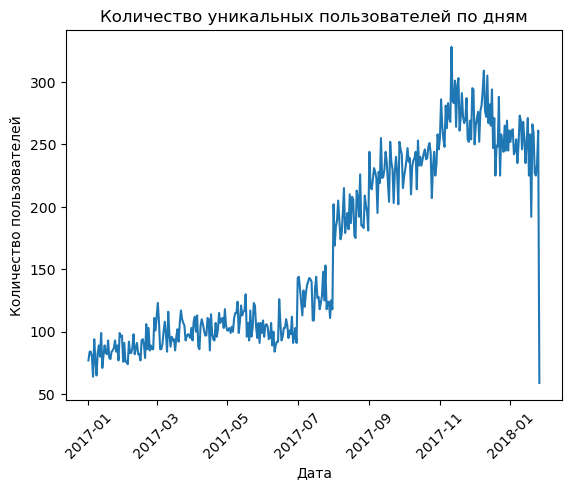

In [6]:
# Проверим, нет ли резких провалов в количестве клиентов, которые могут быть связаны с некорректным сбором данных

unique_users = data.groupby(data['date'].dt.date)['cid'].nunique()

# Построение графика количества уникальных пользователей
plt.plot(unique_users.index, unique_users.values)
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.title('Количество уникальных пользователей по дням')
plt.xticks(rotation=45)

plt.show()

In [7]:
# Принимаю решение удалить последний день в данных, так как предполагаю ошибку в качестве данных
max_date = data['date'].max()
data = data.drop(data[data['date'].dt.date == max_date.date()].index)

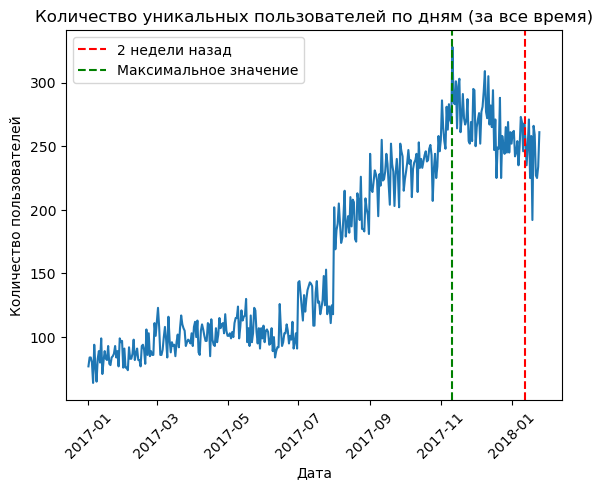

In [8]:
unique_users = data.groupby(data['date'].dt.date)['cid'].nunique()

# Построение графика количества уникальных пользователей после удаления последнего дня
plt.plot(unique_users.index, unique_users.values)
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.title('Количество уникальных пользователей по дням (за все время)')
plt.xticks(rotation=45)

# Добавление вертикальной красной линии на дате 14 дней от максимальной даты
plt.axvline(x=max_date - pd.DateOffset(days=14), color='red', linestyle='--', label='2 недели назад')

# Нахождение максимального значения количества пользователей и соответствующей даты
max_users = unique_users.max()
max_date = unique_users.idxmax()

# Добавление вертикальной зеленой линии на дате с максимальным значением количества пользователей
plt.axvline(x=max_date, color='green', linestyle='--', label='Максимальное значение')

# Добавление легенды
plt.legend()

plt.show()


In [9]:
min_date = data['date'].dt.date.min()
max_date = data['date'].dt.date.max()

if_miss_date = pd.date_range(start = min_date, end = max_date ).difference(data['date'].dt.date)

print('Период, рассматриваемый в датасете: c',min_date, 'по', max_date, '.', 'Захватывает', data['date'].dt.date.nunique(), 'дней.')
print('Без пропусков в днях: ', len(if_miss_date) == 0)

Период, рассматриваемый в датасете: c 2017-01-01 по 2018-01-25 . Захватывает 390 дней.
Без пропусков в днях:  True


Проверим утверждение менеджера: Две недели назад оказалось, что несмотря на постоянно растущую аудиторию магазина (MAU), суммарная выручка упала.

In [10]:
start_date_last = pd.to_datetime('2017-11-17', utc=True).tz_convert('Etc/GMT+3')
end_date_last = pd.to_datetime('2018-01-25', utc=True).tz_convert('Etc/GMT+3')
start_date_best = pd.to_datetime('2017-04-07', utc=True).tz_convert('Etc/GMT+3')
end_date_best = pd.to_datetime('2017-06-15', utc=True).tz_convert('Etc/GMT+3')

# Фильтрация датасета по последним 10 неделям
last_10_weeks_data = data[(data['date_time'] >= start_date_last) & (data['date_time'] <= end_date_last)]

# Фильтрация датасета по "лучшим" 10 неделям
best_10_weeks_data = data[(data['date_time'] >= start_date_best) & (data['date_time'] <= end_date_best)]


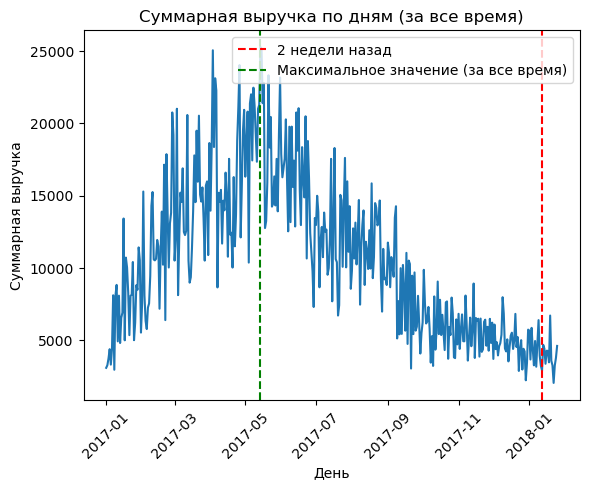

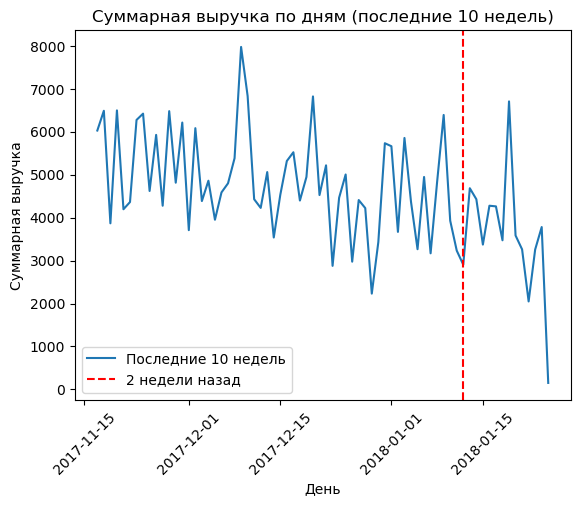

In [11]:
# Группировка данных по дням и суммирование выручки
daily_revenue_all = data.groupby(pd.Grouper(key='date', freq='D'))['sum'].sum()
daily_revenue_last_10_weeks = last_10_weeks_data.groupby(pd.Grouper(key='date', freq='D'))['sum'].sum()

# Построение графика суммарной выручки по дням за все время
plt.plot(daily_revenue_all.index, daily_revenue_all.values)
plt.xlabel('День')
plt.ylabel('Суммарная выручка')
plt.title('Суммарная выручка по дням (за все время)')

# Добавление вертикальной красной линии на дате 14 дней от максимальной даты
max_date = data['date'].max()
plt.axvline(x=max_date - pd.DateOffset(days=14), color='red', linestyle='--', label='2 недели назад')

# Добавление вертикальной зеленой линии на дате с максимальным значением за все время
max_value_date_all = daily_revenue_all.idxmax()
plt.axvline(x=max_value_date_all, color='green', linestyle='--', label='Максимальное значение (за все время)')

plt.legend()
plt.xticks(rotation=45)
plt.show()

# Построение графика суммарной выручки по дням за последние 10 недель
plt.plot(daily_revenue_last_10_weeks.index, daily_revenue_last_10_weeks.values, label='Последние 10 недель')
plt.xlabel('День')
plt.ylabel('Суммарная выручка')
plt.title('Суммарная выручка по дням (последние 10 недель)')

# Добавление вертикальной красной линии на дате 14 дней от максимальной даты
plt.axvline(x=max_date - pd.DateOffset(days=14), color='red', linestyle='--', label='2 недели назад')


plt.legend()
plt.xticks(rotation=45)
plt.show()

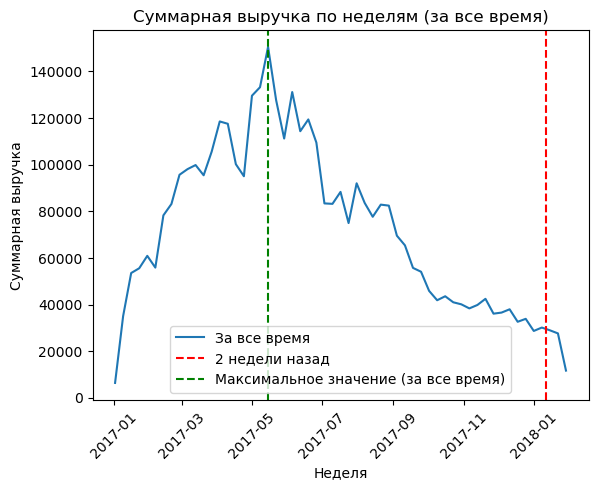

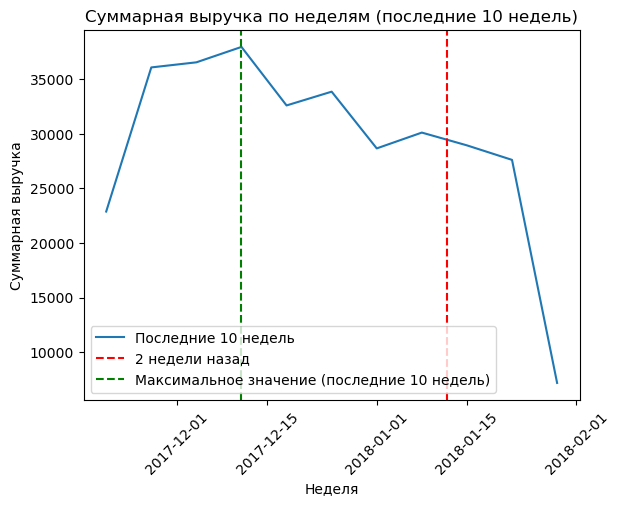

In [12]:
# Группировка данных по неделям и суммирование выручки
weekly_revenue_all = data.groupby(pd.Grouper(key='date', freq='W-MON'))['sum'].sum()
weekly_revenue_last_10_weeks = last_10_weeks_data.groupby(pd.Grouper(key='date', freq='W-MON'))['sum'].sum()

# Построение графика суммарной выручки по неделям за все время
plt.plot(weekly_revenue_all.index, weekly_revenue_all.values, label='За все время')
plt.xlabel('Неделя')
plt.ylabel('Суммарная выручка')
plt.title('Суммарная выручка по неделям (за все время)')

# Добавление вертикальной красной линии на дате 14 дней от максимальной даты
max_date = data['date'].max()
plt.axvline(x=max_date - pd.DateOffset(days=14), color='red', linestyle='--', label='2 недели назад')

# Добавление вертикальной зеленой линии на дате с максимальным значением за все время
max_value_date_all = weekly_revenue_all.idxmax()
plt.axvline(x=max_value_date_all, color='green', linestyle='--', label='Максимальное значение (за все время)')

plt.legend()
plt.xticks(rotation=45)
plt.show()

# Построение графика суммарной выручки по неделям за последние 10 недель
plt.plot(weekly_revenue_last_10_weeks.index, weekly_revenue_last_10_weeks.values, label='Последние 10 недель')
plt.xlabel('Неделя')
plt.ylabel('Суммарная выручка')
plt.title('Суммарная выручка по неделям (последние 10 недель)')

# Добавление вертикальной красной линии на дате 14 дней от максимальной даты
plt.axvline(x=max_date - pd.DateOffset(weeks=2), color='red', linestyle='--', label='2 недели назад')

# Добавление вертикальной зеленой линии на дате с максимальным значением за последние 10 недель
max_value_date_last_10_weeks = weekly_revenue_last_10_weeks.idxmax()
plt.axvline(x=max_value_date_last_10_weeks, color='green', linestyle='--', label='Максимальное значение (последние 10 недель)')

plt.legend()
plt.xticks(rotation=45)
plt.show()

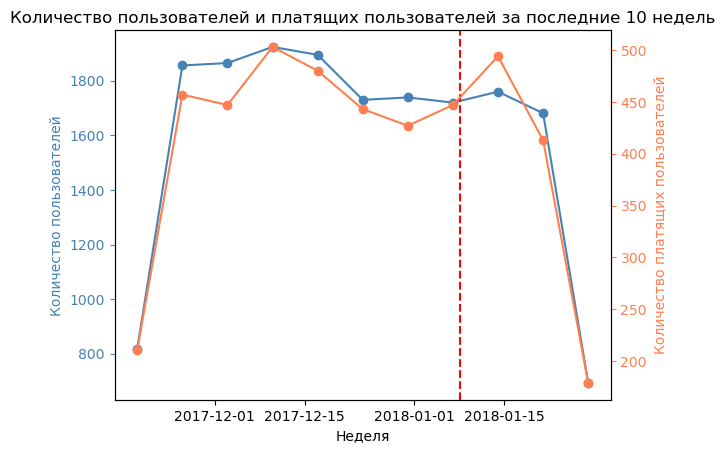

In [13]:
# Группировка данных по неделям и подсчет количества пользователей и платящих пользователей
weekly_users = last_10_weeks_data.groupby(pd.Grouper(key='date_time', freq='W'))['cid'].nunique()
weekly_paying_users = last_10_weeks_data[last_10_weeks_data['sum'].notnull()].groupby(pd.Grouper(key='date_time', freq='W'))['cid'].nunique()

# Создание графика
sns.set_palette("pastel")
fig, ax1 = plt.subplots()

# График количества пользователей по неделям
ax1.plot(weekly_users.index, weekly_users.values, color='steelblue', marker='o')
ax1.set_xlabel('Неделя')
ax1.set_ylabel('Количество пользователей', color='steelblue')
ax1.tick_params(axis='y', colors='steelblue')

# Создание второй оси для количества платящих пользователей
ax2 = ax1.twinx()
ax2.plot(weekly_paying_users.index, weekly_paying_users.values, color='coral', marker='o')
ax2.set_ylabel('Количество платящих пользователей', color='coral')
ax2.tick_params(axis='y', colors='coral')

# Добавление красной вертикальной линии на дате 8 января
ax1.axvline(pd.to_datetime('2018-01-08').date(), color='red', linestyle='--')

# Добавление подписей и заголовка графика
plt.title('Количество пользователей и платящих пользователей за последние 10 недель')
plt.show()

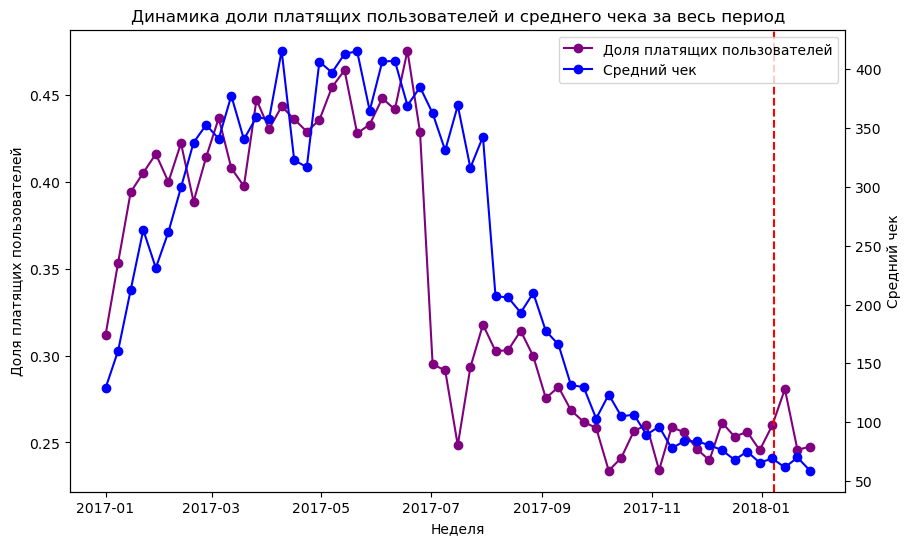

In [14]:
# Группировка данных по неделям и подсчет количества пользователей, платящих пользователей и суммы выручки
weekly_users = data.groupby(pd.Grouper(key='date_time', freq='W', sort=True))['cid'].nunique().reset_index()
weekly_paying_users = data[data['sum'].notnull()].groupby(pd.Grouper(key='date_time', freq='W', sort=True))['cid'].nunique().reset_index()
weekly_revenue = data[data['sum'].notnull()].groupby(pd.Grouper(key='date_time', freq='W', sort=True))['sum'].sum().reset_index()

weekly_users_data = weekly_paying_users.merge(weekly_users, on='date_time', suffixes=('_pay', '_total')).merge(weekly_revenue, on='date_time')

# Расчет доли платящих пользователей
weekly_users_data['weekly_paying_users_ratio'] = weekly_users_data['cid_pay']/weekly_users_data['cid_total']

# Расчет среднего чека
weekly_users_data['avg_check'] = weekly_users_data['sum'] / weekly_users_data['cid_pay']


fig, ax1 = plt.subplots(figsize=(10, 6))

# Создаем график динамики доли платящих пользователей

ax1.plot(weekly_users_data['date_time'], weekly_users_data['weekly_paying_users_ratio'], color='purple', marker='o', label='Доля платящих пользователей')
plt.xlabel('Неделя')
plt.ylabel('Доля платящих пользователей')
plt.title('Динамика доли платящих пользователей и среднего чека за весь период')

# График динамики среднего чека
ax2 = ax1.twinx()
ax2.plot(weekly_users_data['date_time'], weekly_users_data['avg_check'], color='blue', marker='o', label='Средний чек')
ax2.set_ylabel('Средний чек')

# Добавление красной вертикальной линии на дате 8 января
ax1.axvline(pd.to_datetime('2018-01-08').date(), color='red', linestyle='--')

# Легенда
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

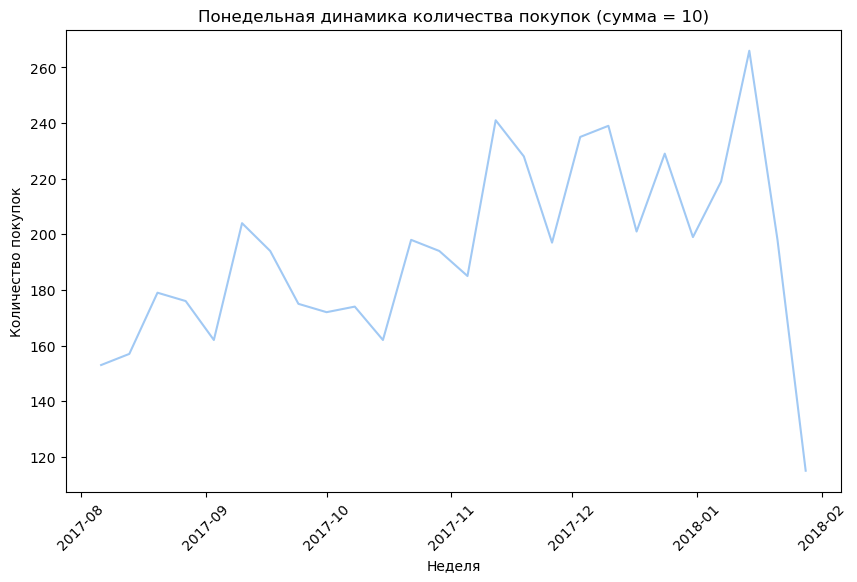

In [15]:
# Фильтрация данных по условию суммы покупки равной 10
filtered_data = data[data['sum'] == 10]

# Группировка данных по неделям и подсчет количества покупок
weekly_purchase_counts = filtered_data.groupby(pd.Grouper(key='date_time', freq='W'))['cid'].count()

# Построение графика понедельной динамики количества покупок
plt.figure(figsize=(10, 6))
plt.plot(weekly_purchase_counts.index, weekly_purchase_counts.values)
plt.xlabel('Неделя')
plt.ylabel('Количество покупок')
plt.title('Понедельная динамика количества покупок (сумма = 10)')
plt.xticks(rotation=45)
plt.show()


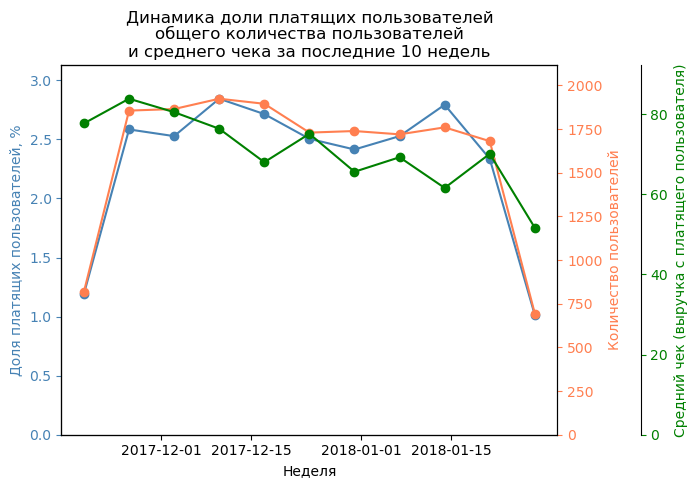

In [16]:
# Группировка данных по неделям и подсчет количества пользователей, платящих пользователей и суммы выручки
weekly_users = last_10_weeks_data.groupby(pd.Grouper(key='date', freq='W', sort=True))['cid'].nunique().reset_index()
weekly_paying_users = last_10_weeks_data[last_10_weeks_data['sum'].notnull()].groupby(pd.Grouper(key='date', freq='W', sort=True))['cid'].nunique().reset_index()
revenue_per_user = last_10_weeks_data[last_10_weeks_data['sum'].notnull()].groupby(pd.Grouper(key='date', freq='W', sort=True))['sum'].sum().reset_index()

# Расчет среднего чека
avg_check = weekly_paying_users.merge(weekly_users, on='date', suffixes=('_pay', '_total')).merge(revenue_per_user, on='date')
avg_check['avg_check'] = avg_check['sum'] / avg_check['cid_pay']

# Создание графика
sns.set_palette("pastel")
fig, ax1 = plt.subplots()

# График доли платящих пользователей
ax1.plot(weekly_paying_users['date'], (avg_check['cid_pay'] / avg_check['cid_total'].sum()) * 100, color='steelblue', marker='o')
ax1.set_xlabel('Неделя')
ax1.set_ylabel('Доля платящих пользователей, %', color='steelblue')
ax1.tick_params(axis='y', colors='steelblue')

# Создание второй оси для количества пользователей
ax2 = ax1.twinx()
ax2.plot(revenue_per_user['date'],avg_check['cid_total'], color='coral', marker='o')
ax2.set_ylabel('Количество пользователей', color='coral')
ax2.tick_params(axis='y', colors='coral')

# Создание третьей оси для среднего чека
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Расположение оси справа от оси Y
ax3.plot(avg_check['date'], avg_check['avg_check'], color='green', marker='o')
ax3.set_ylabel('Средний чек (выручка с платящего пользователя)', color='green')
ax3.tick_params(axis='y', colors='green')

# Установка границ осей
ax1.set_ylim([0, max((avg_check['cid_pay'] / avg_check['cid_total'].sum()) * 100) * 1.1])
ax2.set_ylim([0, max(avg_check['cid_total']) * 1.1])
ax3.set_ylim([0, max(avg_check['avg_check']) * 1.1])

# Добавление подписей и заголовка графика
ax1.set_title('Динамика доли платящих пользователей\nобщего количества пользователей\nи среднего чека за последние 10 недель')

# Поворот меток оси X для улучшения читаемости
plt.xticks(rotation=45)

plt.show()

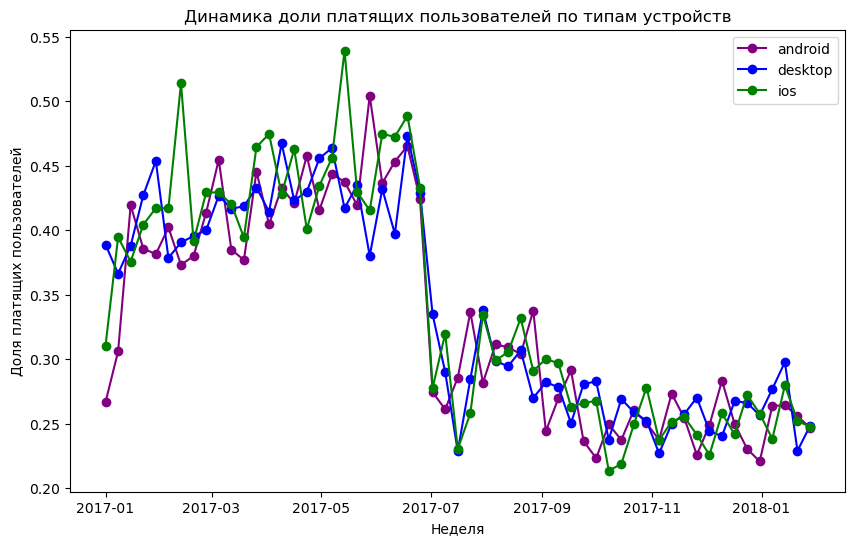

In [17]:
# Группировка данных по неделям и типам устройств и подсчет количества пользователей и платящих пользователей
weekly_users_platform = data.groupby([pd.Grouper(key='date_time', freq='W'), 'platform'])['cid'].nunique()
weekly_paying_users_platform = data[data['sum'].notnull()].groupby([pd.Grouper(key='date_time', freq='W'), 'platform'])['cid'].nunique()

# Расчет доли платящих пользователей для каждого типа устройства
weekly_paying_users_ratio_platform = weekly_paying_users_platform / weekly_users_platform

# Создаем график динамики доли платящих пользователей по типам устройств
plt.figure(figsize=(10, 6))
platforms = data['platform'].unique()
colors = ['purple', 'blue', 'green']  # Цвета для разных типов устройств

for i, platform in enumerate(platforms):
    platform_data = weekly_paying_users_ratio_platform[:, platform]
    plt.plot(platform_data.index, platform_data.values, color=colors[i], marker='o', label=platform)

plt.xlabel('Неделя')
plt.ylabel('Доля платящих пользователей')
plt.title('Динамика доли платящих пользователей по типам устройств')
plt.legend()
plt.show()


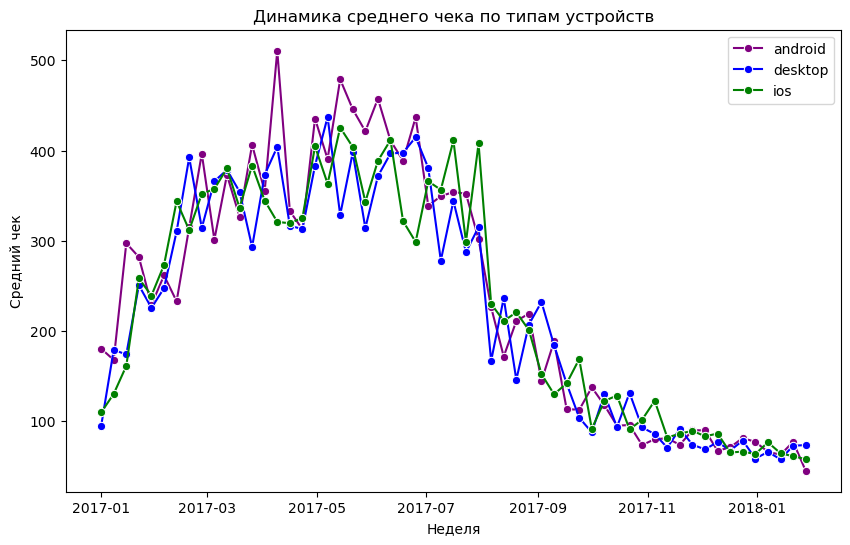

In [18]:
# Группировка данных по каналу привлечения, неделям и типам устройств и подсчет суммы выручки и количества платящих пользователей
revenue_platform = data.groupby([pd.Grouper(key='date_time', freq='W'), 'platform'])['sum'].sum().reset_index()
pay_users_platform = data[data['sum'].notnull()].groupby([pd.Grouper(key='date_time', freq='W'), 'platform'])['cid'].nunique().reset_index()

# Объединение данных и расчет среднего чека
avg_check_platform = revenue_platform.merge(pay_users_platform, on=['date_time', 'platform'])
avg_check_platform['avg_check'] = avg_check_platform['sum'] / avg_check_platform['cid']

# Создаем график динамики среднего чека с разбивкой по типам устройств
plt.figure(figsize=(10, 6))
platforms = data['platform'].unique()
colors = ['purple', 'blue', 'green']  # Цвета для разных типов устройств

for i, platform in enumerate(platforms):
    platform_data = avg_check_platform[avg_check_platform['platform'] == platform]
    sns.lineplot(data=platform_data, x='date_time', y='avg_check', marker='o', color=colors[i], label=platform)

plt.xlabel('Неделя')
plt.ylabel('Средний чек')
plt.title('Динамика среднего чека по типам устройств')
plt.legend()
plt.show()

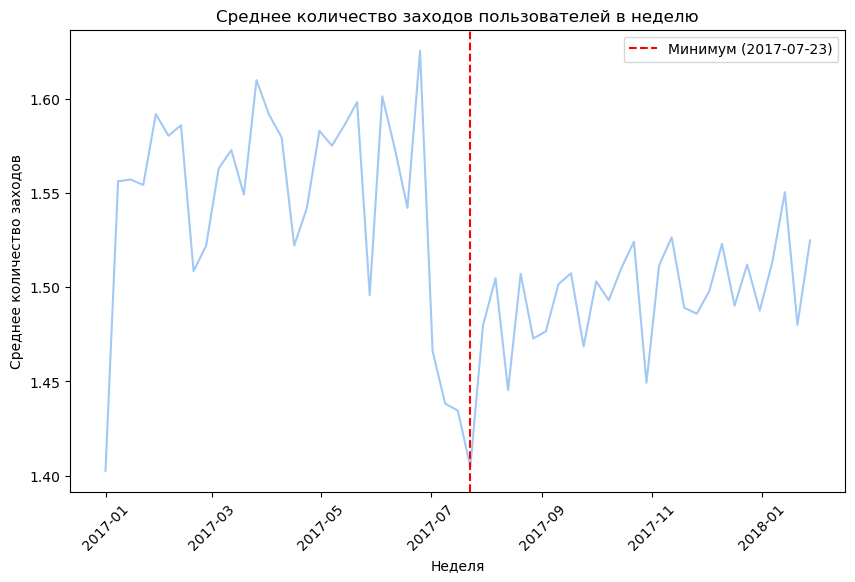

In [19]:
# Рассчитываем частоту заходов пользователей в неделю
user_weekly_frequency = data[data['action']=='open'].groupby(['cid', pd.Grouper(key='date_time', freq='W')])['cid'].count().reset_index(name='частота')

# Рассчитываем среднее количество заходов пользователей в каждую неделю
average_frequency = user_weekly_frequency.groupby(pd.Grouper(key='date_time', freq='W'))['частота'].mean()

# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(average_frequency.index, average_frequency.values)
plt.xlabel('Неделя')
plt.ylabel('Среднее количество заходов')
plt.title('Среднее количество заходов пользователей в неделю')
plt.xticks(rotation=45)

# Нахождение минимума
min_value = average_frequency.iloc[1:].min()
min_date = average_frequency.iloc[1:].idxmin() 

# Добавление вертикальной линии на минимум
plt.axvline(min_date, color='red', linestyle='--', label=f'Минимум ({min_date.strftime("%Y-%m-%d")})')

# Подпись осей и легенда
plt.xlabel('Неделя')
plt.ylabel('Среднее количество заходов')
plt.title('Среднее количество заходов пользователей в неделю')
plt.legend()

# Отображение графика
plt.show()


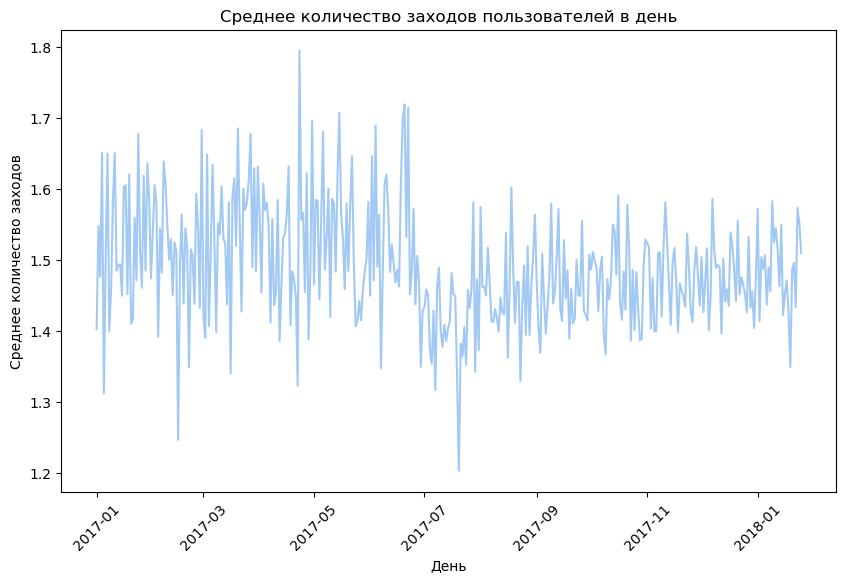

In [20]:
# Рассчитываем частоту заходов пользователей в день
user_daily_frequency = data[data['action']=='open'].groupby(['cid', pd.Grouper(key='date_time', freq='D')])['cid'].count().reset_index(name='frequency')


# Рассчитываем среднее количество заходов пользователей в каждый день
average_frequency = user_daily_frequency.groupby(pd.Grouper(key='date_time', freq='D'))['frequency'].mean()

# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(average_frequency.index, average_frequency.values)
plt.xlabel('День')
plt.ylabel('Среднее количество заходов')
plt.title('Среднее количество заходов пользователей в день')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Сортировка данных по столбцу 'date_time'
data_sorted = data.sort_values('date_time')

# Поиск индексов первых вхождений для каждого пользователя
first_indices = data_sorted.drop_duplicates(subset='cid', keep='first').index

# Выделение месяца из столбца 'date_time' и подсчет количества новых пользователей в каждом месяце
new_users_by_month = data_sorted.loc[first_indices].groupby(data_sorted['date_time'].dt.to_period('M')).size().reset_index()
new_users_by_month.columns = ['Месяц', 'Количество новых пользователей']

# Подсчет общего количества уникальных пользователей в каждом месяце
total_users_by_month = data_sorted.groupby(data_sorted['date_time'].dt.to_period('M'))['cid'].nunique().reset_index()
total_users_by_month.columns = ['Месяц', 'Общее количество пользователей']

# Объединение таблиц с данными о новых и общих пользователях по месяцу
new_users_by_month = new_users_by_month.merge(total_users_by_month, on='Месяц')

# Добавление столбца с долей новых пользователей
new_users_by_month['Доля новых пользователей'] = new_users_by_month['Количество новых пользователей'] / new_users_by_month['Общее количество пользователей']

new_users_by_month


c:\Users\Maria\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Maria\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,Месяц,Количество новых пользователей,Общее количество пользователей,Доля новых пользователей
0,2017-01,2346,2346,1.000000
1,2017-02,1940,2249,0.862606
2,2017-03,2247,2766,0.812364
3,2017-04,2135,2788,0.765782
4,2017-05,2206,2976,0.741263
5,2017-06,1913,2692,0.710624
6,2017-07,2942,3708,0.793420
7,2017-08,4733,5476,0.864317
8,2017-09,5446,6330,0.860348
9,2017-10,5748,6801,0.845170


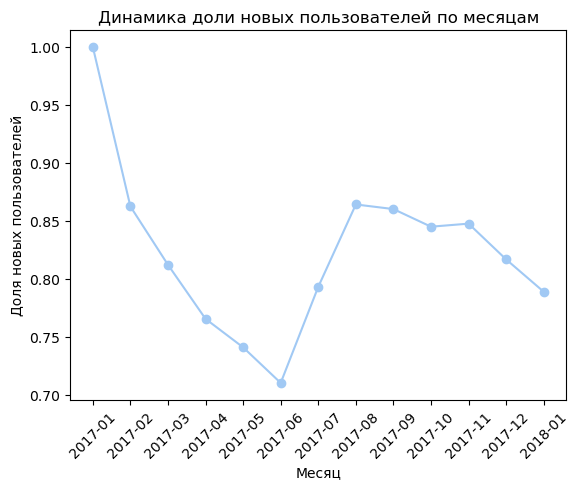

In [22]:
plt.plot(new_users_by_month['Месяц'].dt.strftime('%Y-%m'), new_users_by_month['Доля новых пользователей'], marker='o')
plt.xlabel('Месяц')
plt.ylabel('Доля новых пользователей')
plt.title('Динамика доли новых пользователей по месяцам')
plt.xticks(rotation=45)

plt.show()

In [23]:
# Группировка данных по месяцу регистрации и подсчет уникальных пользователей
registration_counts = data.groupby(data['date_time'].dt.to_period('M'))['cid'].nunique()

retention = pd.DataFrame(index=registration_counts.index, columns=registration_counts.index)

# Заполнение таблицы retention значениями
for i in range(len(retention.columns)):
    for j in range(len(retention.index)):
        month_start = retention.columns[i]
        month_end = retention.index[j]
        if month_end >= month_start:
            active_users = data[(data['date_time'].dt.to_period('M') == month_start)]['cid'].unique()
            retained_users = data[(data['date_time'].dt.to_period('M') == month_end) & (data['cid'].isin(active_users))]['cid'].nunique()
            retention.iloc[j, i] = retained_users / registration_counts[month_start]


retention

c:\Users\Maria\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Maria\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


date_time,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01
date_time,,,,,,,,,,,,,
2017-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,0.131714,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,0.102302,0.14851,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04,0.062234,0.099155,0.145336,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05,0.034101,0.060027,0.096168,0.161047,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06,0.016624,0.036461,0.060376,0.093615,0.154906,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07,0.01705,0.027123,0.039407,0.061334,0.094422,0.144131,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,0.01023,0.015118,0.024946,0.036227,0.061828,0.089896,0.106257,1.0,NaN,NaN,NaN,NaN,NaN
2017-09,0.005115,0.007559,0.0188,0.024749,0.035282,0.056092,0.064455,0.101717,1.0,NaN,NaN,NaN,NaN


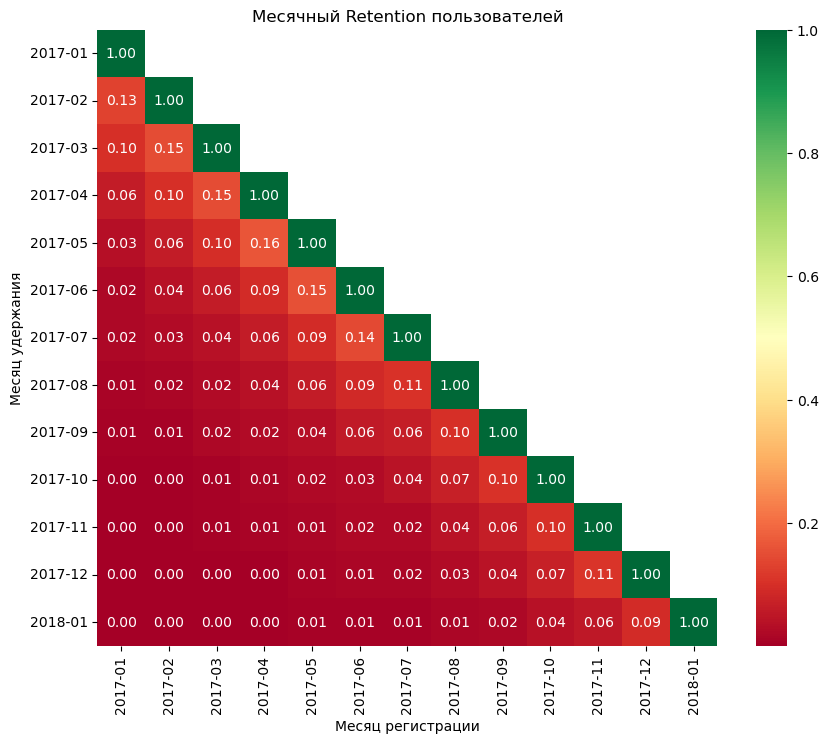

In [24]:
retention_numeric = retention.astype(float)

# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(retention_numeric, annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Месячный Retention пользователей')
plt.xlabel('Месяц регистрации')
plt.ylabel('Месяц удержания')
plt.show()

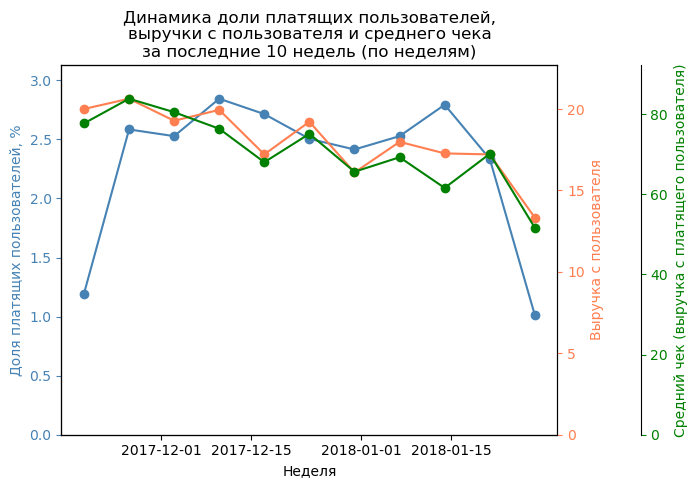

In [25]:
# Группировка данных по неделям и подсчет количества пользователей, платящих пользователей и суммы выручки
weekly_users = last_10_weeks_data.groupby(pd.Grouper(key='date', freq='W', sort=True))['cid'].nunique().reset_index()
weekly_paying_users = last_10_weeks_data[last_10_weeks_data['sum'].notnull()].groupby(pd.Grouper(key='date', freq='W', sort=True))['cid'].nunique().reset_index()
revenue_per_user = last_10_weeks_data[last_10_weeks_data['sum'].notnull()].groupby(pd.Grouper(key='date', freq='W', sort=True))['sum'].sum().reset_index()

# Расчет среднего чека
avg_check = weekly_paying_users.merge(weekly_users, on='date', suffixes=('_pay', '_total')).merge(revenue_per_user, on='date')
avg_check['avg_check'] = avg_check['sum'] / avg_check['cid_pay']
avg_check['rev_user'] = avg_check['sum'] / avg_check['cid_total']

# Создание графика
sns.set_palette("pastel")
fig, ax1 = plt.subplots()

# График доли платящих пользователей
ax1.plot(weekly_paying_users['date'], (avg_check['cid_pay'] / avg_check['cid_total'].sum()) * 100, color='steelblue', marker='o')
ax1.set_xlabel('Неделя')
ax1.set_ylabel('Доля платящих пользователей, %', color='steelblue')
ax1.tick_params(axis='y', colors='steelblue')

# Создание второй оси для выручки с пользователя
ax2 = ax1.twinx()
ax2.plot(revenue_per_user['date'],avg_check['rev_user'], color='coral', marker='o')
ax2.set_ylabel('Выручка с пользователя', color='coral')
ax2.tick_params(axis='y', colors='coral')

# Создание третьей оси для среднего чека
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Расположение оси справа от оси Y
ax3.plot(avg_check['date'], avg_check['avg_check'], color='green', marker='o')
ax3.set_ylabel('Средний чек (выручка с платящего пользователя)', color='green')
ax3.tick_params(axis='y', colors='green')

# Установка границ осей
ax1.set_ylim([0, max((avg_check['cid_pay'] / avg_check['cid_total'].sum()) * 100) * 1.1])
ax2.set_ylim([0, max(avg_check['rev_user']) * 1.1])
ax3.set_ylim([0, max(avg_check['avg_check']) * 1.1])

# Добавление подписей и заголовка графика
ax1.set_title('Динамика доли платящих пользователей,\nвыручки с пользователя и среднего чека\nза последние 10 недель (по неделям)')


plt.xticks(rotation=45)

plt.show()

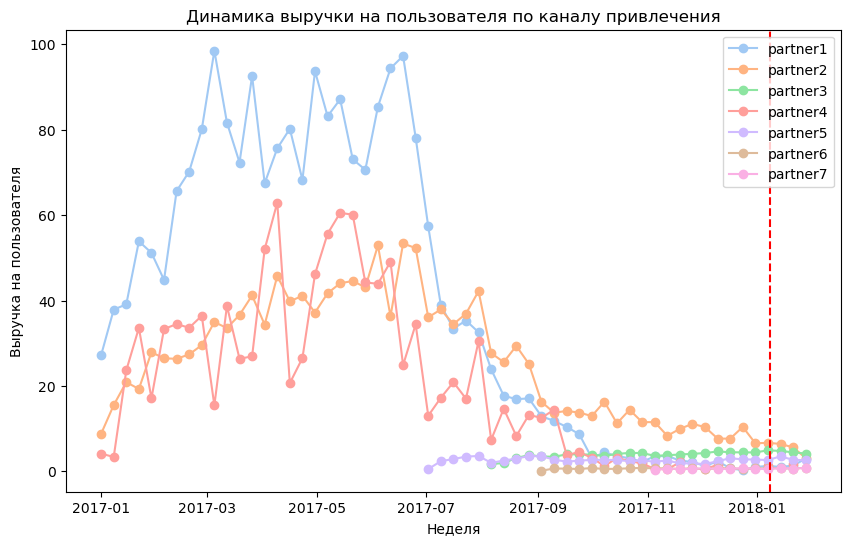

In [26]:
# Группировка данных по неделям и подсчет количества пользователей и суммы платежей
weekly_users = data.groupby(pd.Grouper(key='date_time', freq='W'))['cid'].nunique()
weekly_sum_payments = data[data['sum'].notnull()].groupby([pd.Grouper(key='date_time', freq='W'), 'channel'])['sum'].sum()

# Вычисление среднего чека по каналу привлечения
weekly_avg_payment = weekly_sum_payments / weekly_users

# Создаем график динамики выручки на пользователя по каналу привлечения
plt.figure(figsize=(10, 6))

for channel in weekly_avg_payment.unstack().columns:
    plt.plot(weekly_avg_payment.unstack()[channel].index, weekly_avg_payment.unstack()[channel].values, marker='o', label=channel)

plt.xlabel('Неделя')
plt.ylabel('Выручка на пользователя')
plt.title('Динамика выручки на пользователя по каналу привлечения')
plt.legend()

# Добавление красной вертикальной линии на дате 8 января
plt.axvline(pd.to_datetime('2018-01-08').date(), color='red', linestyle='--')

plt.show()

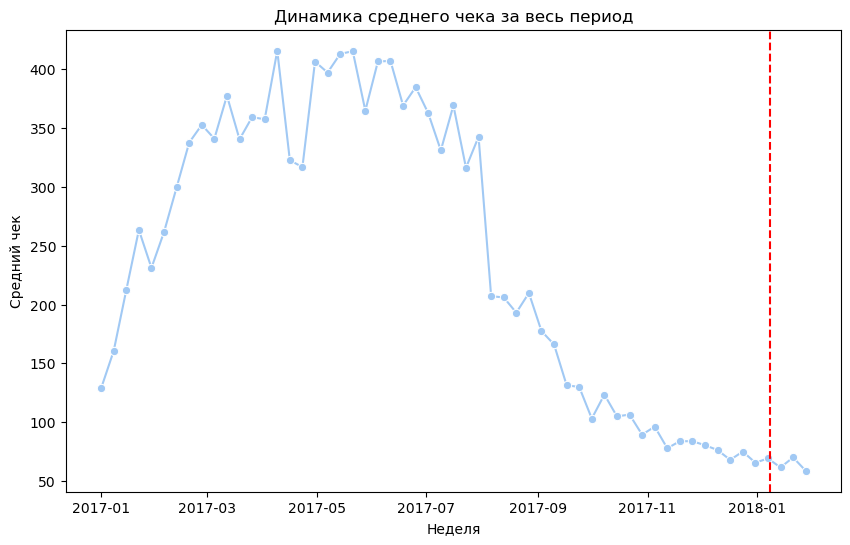

In [27]:
# Группировка данных по каналу привлечения и неделям и подсчет суммы выручки и количества платящих пользователей
revenue = data.groupby([pd.Grouper(key='date_time', freq='W')])['sum'].sum().reset_index()
pay_users = data[data['sum'].notnull()].groupby([pd.Grouper(key='date_time', freq='W')])['cid'].nunique().reset_index()

# Объединение данных и расчет среднего чека
avg_check = revenue.merge(pay_users, on=['date_time'])
avg_check['avg_check'] = avg_check['sum'] / avg_check['cid']

# Создаем график динамики среднего чека с разбивкой по каналу привлечения
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_check, x='date_time', y='avg_check', marker='o')
plt.xlabel('Неделя')
plt.ylabel('Средний чек')
plt.title('Динамика среднего чека за весь период')

# Добавление красной вертикальной линии на дате 8 января
plt.axvline(pd.to_datetime('2018-01-08').date(), color='red', linestyle='--')

plt.show()


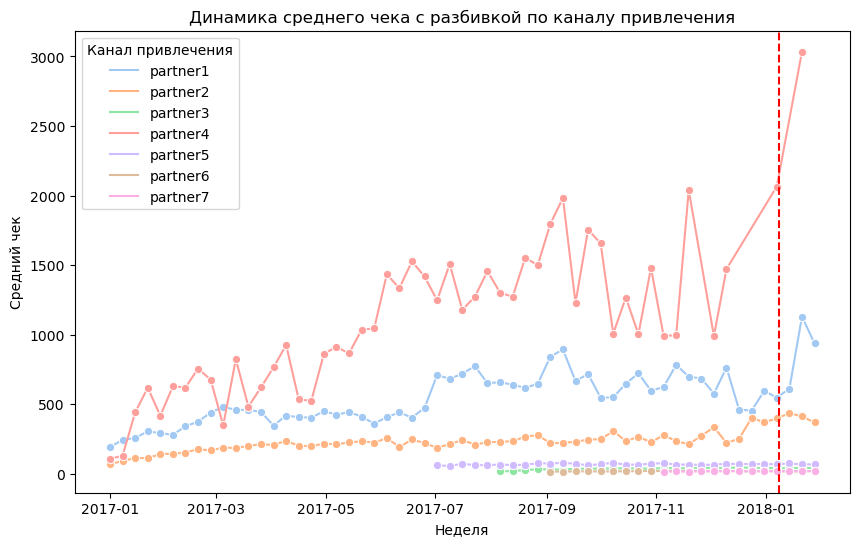

In [28]:
# Группировка данных по каналу привлечения и неделям и подсчет суммы выручки и количества платящих пользователей
channel_revenue = data.groupby(['channel', pd.Grouper(key='date_time', freq='W')])['sum'].sum().reset_index()
channel_pay_users = data[data['sum'].notnull()].groupby(['channel', pd.Grouper(key='date_time', freq='W')])['cid'].nunique().reset_index()

# Объединение данных и расчет среднего чека
channel_avg_check = channel_revenue.merge(channel_pay_users, on=['channel', 'date_time'])
channel_avg_check['avg_check'] = channel_avg_check['sum'] / channel_avg_check['cid']

# Создаем график динамики среднего чека с разбивкой по каналу привлечения
plt.figure(figsize=(10, 6))
sns.lineplot(data=channel_avg_check, x='date_time', y='avg_check', hue='channel', marker='o')
plt.xlabel('Неделя')
plt.ylabel('Средний чек')
plt.title('Динамика среднего чека с разбивкой по каналу привлечения')

# Добавление красной вертикальной линии на дате 8 января
plt.axvline(pd.to_datetime('2018-01-08').date(), color='red', linestyle='--')

plt.legend(title='Канал привлечения')
plt.show()


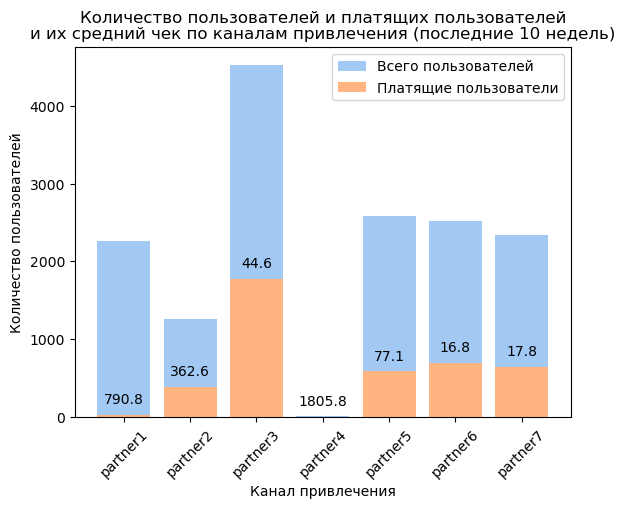

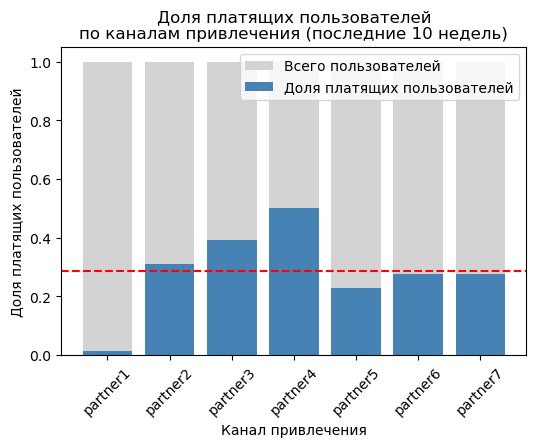

In [29]:
# Группировка данных за выбранный период по каналу привлечения и подсчет количества пользователей и платящих пользователей
channel_users = last_10_weeks_data.groupby('channel')['cid'].nunique().reset_index()
channel_paying_users = last_10_weeks_data[last_10_weeks_data['sum'].notnull()].groupby('channel')['cid'].nunique().reset_index()
channel_revenue = last_10_weeks_data[last_10_weeks_data['sum'].notnull()].groupby('channel')['sum'].sum().reset_index()

# Объединение данных и расчет доли платящих пользователей
channel_pay_ratio = channel_paying_users.merge(channel_users, on=['channel'], suffixes=('_pay', '_total')).merge(channel_revenue, on=['channel'])
channel_pay_ratio['pay_ratio'] = channel_pay_ratio['cid_pay'] / channel_pay_ratio['cid_total']
channel_pay_ratio['avg_check'] = channel_pay_ratio['sum'] / channel_pay_ratio['cid_pay']

# Создание первого графика с количеством пользователей и платящих пользователей
fig, ax = plt.subplots()
ax.bar(channel_pay_ratio['channel'], channel_pay_ratio['cid_total'], label='Всего пользователей')
ax.bar(channel_pay_ratio['channel'], channel_pay_ratio['cid_pay'], label='Платящие пользователи')
ax.set_xlabel('Канал привлечения')
ax.set_ylabel('Количество пользователей')
ax.set_title('Количество пользователей и платящих пользователей\nи их средний чек по каналам привлечения (последние 10 недель)')
plt.xticks(rotation=45)
ax.legend()

# Добавление подписей о среднем чеке над столбцами
for x, y, avg_check in zip(channel_pay_ratio['channel'], channel_pay_ratio['cid_pay'], channel_pay_ratio['avg_check']):
    plt.text(x, y + 100, f"{avg_check:.1f}", ha='center', va='bottom')


# Создание второго графика с долей платящих пользователей
plt.figure(figsize=(6, 4))
plt.bar(channel_pay_ratio['channel'], [1] * len(channel_pay_ratio), label='Всего пользователей', color='lightgray')
plt.bar(channel_pay_ratio['channel'], channel_pay_ratio['pay_ratio'], label='Доля платящих пользователей', color='steelblue')
plt.xlabel('Канал привлечения')
plt.ylabel('Доля платящих пользователей')
plt.title('Доля платящих пользователей\nпо каналам привлечения (последние 10 недель)')
plt.xticks(rotation=45)
plt.legend()

# Расчет и добавление горизонтальной линии со средним значением
mean_ratio = channel_pay_ratio['pay_ratio'].mean()
plt.axhline(mean_ratio, color='red', linestyle='--', label='Среднее значение')

plt.show()

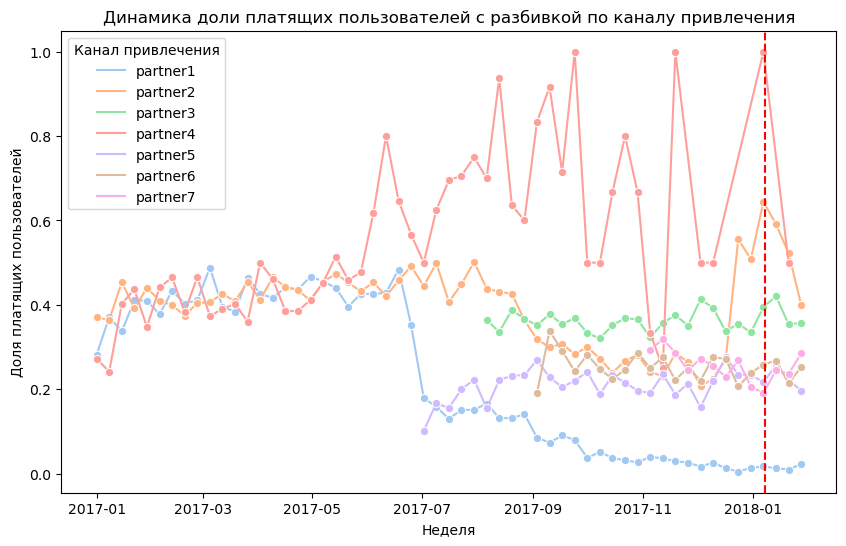

In [30]:

# Группировка данных по каналу привлечения и неделям и подсчет количества пользователей и платящих пользователей
channel_users = data.groupby(['channel', pd.Grouper(key='date_time', freq='W')])['cid'].nunique().reset_index()
channel_pay_users = data[data['sum'].notnull()].groupby(['channel', pd.Grouper(key='date_time', freq='W')])['cid'].nunique().reset_index()

# Объединение данных и расчет доли платящих пользователей
channel_pay_ratio = channel_pay_users.merge(channel_users, on=['channel', 'date_time'], suffixes=('_pay', '_total'))
channel_pay_ratio['pay_ratio'] = channel_pay_ratio['cid_pay'] / channel_pay_ratio['cid_total']

# Создаем график динамики доли платящих пользователей с разбивкой по каналу привлечения
plt.figure(figsize=(10, 6))
sns.lineplot(data=channel_pay_ratio, x='date_time', y='pay_ratio', hue='channel', marker='o')
plt.xlabel('Неделя')
plt.ylabel('Доля платящих пользователей')
plt.title('Динамика доли платящих пользователей с разбивкой по каналу привлечения')

# Добавление красной вертикальной линии на дате 8 января
plt.axvline(pd.to_datetime('2018-01-08').date(), color='red', linestyle='--')

plt.legend(title='Канал привлечения')
plt.show()

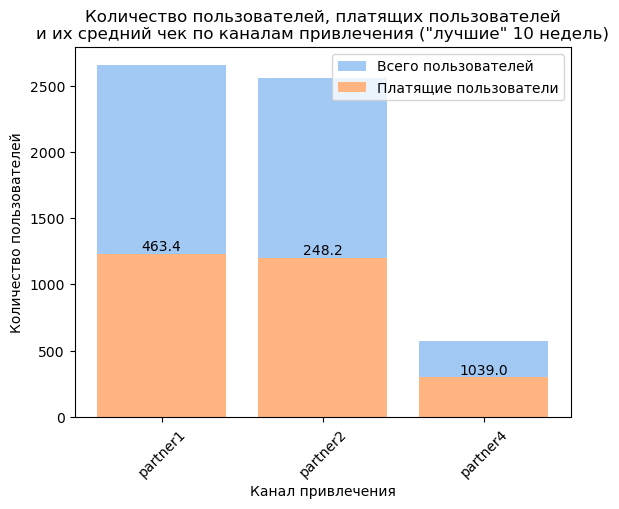

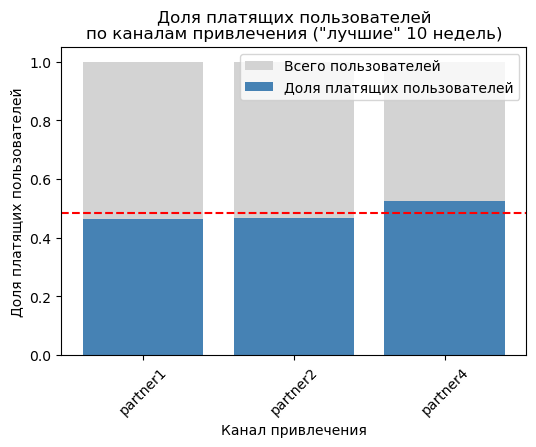

In [31]:
# Группировка данных за выбранный период по каналу привлечения и подсчет количества пользователей и платящих пользователей
channel_users = best_10_weeks_data.groupby('channel')['cid'].nunique().reset_index()
channel_paying_users = best_10_weeks_data[best_10_weeks_data['sum'].notnull()].groupby('channel')['cid'].nunique().reset_index()
channel_revenue = best_10_weeks_data[best_10_weeks_data['sum'].notnull()].groupby('channel')['sum'].sum().reset_index()

# Объединение данных и расчет доли платящих пользователей
channel_pay_ratio = channel_paying_users.merge(channel_users, on=['channel'], suffixes=('_pay', '_total')).merge(channel_revenue, on=['channel'])
channel_pay_ratio['pay_ratio'] = channel_pay_ratio['cid_pay'] / channel_pay_ratio['cid_total']
channel_pay_ratio['avg_check'] = channel_pay_ratio['sum'] / channel_pay_ratio['cid_pay']

# Создание первого графика с количеством пользователей и платящих пользователей
fig, ax = plt.subplots()
ax.bar(channel_pay_ratio['channel'], channel_pay_ratio['cid_total'], label='Всего пользователей')
ax.bar(channel_pay_ratio['channel'], channel_pay_ratio['cid_pay'], label='Платящие пользователи')
ax.set_xlabel('Канал привлечения')
ax.set_ylabel('Количество пользователей')
ax.set_title('Количество пользователей, платящих пользователей\nи их средний чек по каналам привлечения ("лучшие" 10 недель)')
plt.xticks(rotation=45)
ax.legend()

# Добавление подписей о среднем чеке над столбцами
for x, y, avg_check in zip(channel_pay_ratio['channel'], channel_pay_ratio['cid_pay'], channel_pay_ratio['avg_check']):
    plt.text(x, y, f"{avg_check:.1f}", ha='center', va='bottom')


# Создание второго графика с долей платящих пользователей
plt.figure(figsize=(6, 4))
plt.bar(channel_pay_ratio['channel'], [1] * len(channel_pay_ratio), label='Всего пользователей', color='lightgray')
plt.bar(channel_pay_ratio['channel'], channel_pay_ratio['pay_ratio'], label='Доля платящих пользователей', color='steelblue')
plt.xlabel('Канал привлечения')
plt.ylabel('Доля платящих пользователей')
plt.title('Доля платящих пользователей\nпо каналам привлечения ("лучшие" 10 недель)')
plt.xticks(rotation=45)
plt.legend()

# Расчет и добавление горизонтальной линии со средним значением
mean_ratio = channel_pay_ratio['pay_ratio'].mean()
plt.axhline(mean_ratio, color='red', linestyle='--', label='Среднее значение')

plt.show()

In [32]:
# Посмотрим, какие есть типы воронок

# Создание воронки пользователей на основе действий
funnel = last_10_weeks_data.groupby('cid')['action'].apply(tuple).reset_index()

# Подсчет количества каждой комбинации действий
action_combinations = funnel['action'].value_counts()

# Вывод результатов
print("Самые популярные сочетания действий пользователей воронки:")
print(action_combinations.head(15))


Самые популярные сочетания действий пользователей воронки:
(open,)                                          4536
(open, search)                                    561
(open, product_view)                              521
(open, search, product_view)                      265
(open, product_view, add_to_cart)                 223
(open, search, make_order)                        169
(open, product_view, make_order)                  162
(open, product_view, search)                      151
(open, search, open)                              141
(open, product_view, open)                        138
(open, product_view, add_to_cart, make_order)     136
(open, search, product_view, add_to_cart)         111
(open, product_view, add_to_cart, open)           107
(open, search, search)                             89
(open, search, product_view, search)               85
Name: action, dtype: int64


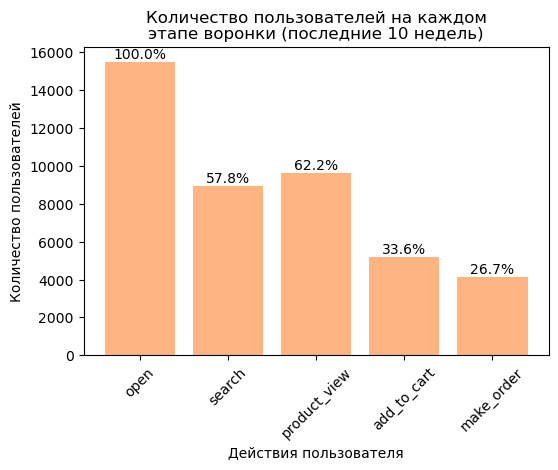

In [33]:
# На каком этапе воронки осекается наибольшее количество пользователей?

# Определение порядка действий пользователя
funnel_order = ['open', 'search', 'product_view', 'add_to_cart', 'make_order']

# Подсчет количества пользователей на каждом этапе воронки
funnel_counts = last_10_weeks_data.groupby('action')['cid'].nunique().reset_index()

# Установка порядка действий воронки
funnel_counts['action'] = pd.Categorical(funnel_counts['action'], categories=funnel_order, ordered=True)

# Сортировка по порядку действий
funnel_counts = funnel_counts.sort_values('action')

# Расчет доли пользователей для каждого этапа
total_users = last_10_weeks_data['cid'].nunique()
funnel_counts['share'] = funnel_counts['cid'] / total_users

# Построение столбчатой диаграммы
plt.figure(figsize=(6, 4))
plt.bar(funnel_counts['action'], funnel_counts['cid'], tick_label=funnel_counts['action'])
plt.xlabel('Действия пользователя')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей на каждом\nэтапе воронки (последние 10 недель)')
plt.xticks(rotation=45)

# Добавление доли от всех пользователей над каждым столбиком
bars = plt.bar(funnel_counts['action'], funnel_counts['cid'], tick_label=funnel_counts['action'])

for bar in bars:
    height = bar.get_height()
    percentage = height / total_users * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{percentage:.1f}%", ha='center', va='bottom')

plt.show()

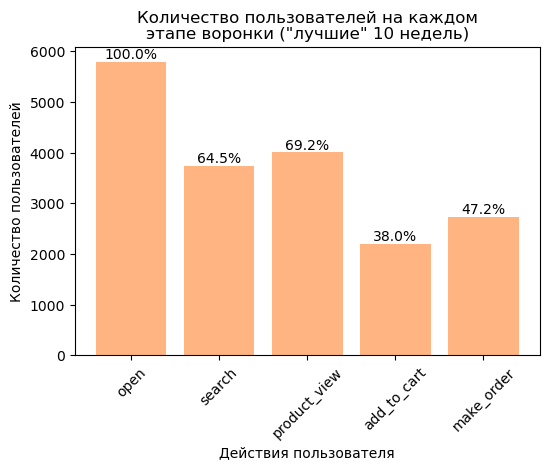

In [34]:
# Определение порядка действий пользователя
funnel_order = ['open', 'search', 'product_view', 'add_to_cart', 'make_order']

# Подсчет количества пользователей на каждом этапе воронки
funnel_counts = best_10_weeks_data.groupby('action')['cid'].nunique().reset_index()

# Установка порядка действий воронки
funnel_counts['action'] = pd.Categorical(funnel_counts['action'], categories=funnel_order, ordered=True)

# Сортировка по порядку действий
funnel_counts = funnel_counts.sort_values('action')

# Расчет доли пользователей для каждого этапа
total_users = best_10_weeks_data['cid'].nunique()
funnel_counts['share'] = funnel_counts['cid'] / total_users

# Построение столбчатой диаграммы
plt.figure(figsize=(6, 4))
plt.bar(funnel_counts['action'], funnel_counts['cid'], tick_label=funnel_counts['action'])
plt.xlabel('Действия пользователя')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей на каждом\nэтапе воронки ("лучшие" 10 недель)')
plt.xticks(rotation=45)

# Добавление доли от всех пользователей над каждым столбиком
bars = plt.bar(funnel_counts['action'], funnel_counts['cid'], tick_label=funnel_counts['action'])

for bar in bars:
    height = bar.get_height()
    percentage = height / total_users * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{percentage:.1f}%", ha='center', va='bottom')

plt.show()

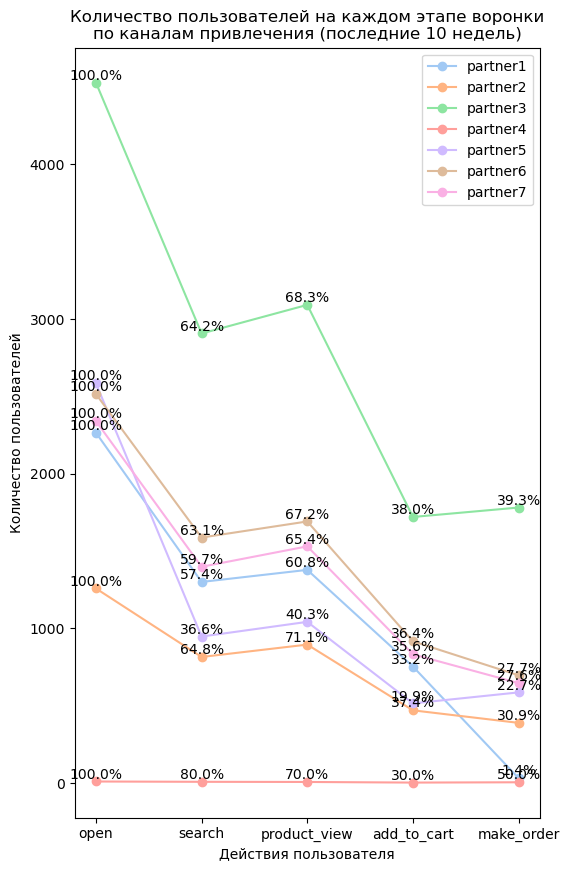

In [35]:
# Определение порядка действий пользователя
funnel_order = ['open', 'search', 'product_view', 'add_to_cart', 'make_order']

# Подсчет количества пользователей на каждом этапе воронки по каналам привлечения
funnel_counts = last_10_weeks_data.groupby(['channel', 'action'])['cid'].nunique().reset_index()

# Установка порядка действий воронки
funnel_counts['action'] = pd.Categorical(funnel_counts['action'], categories=funnel_order, ordered=True)

# Сортировка по порядку действий
funnel_counts = funnel_counts.sort_values(['channel', 'action'])

# Расчет доли пользователей для каждого этапа и каждого канала
total_users_by_channel = last_10_weeks_data.groupby('channel')['cid'].nunique()
funnel_counts['share'] = funnel_counts.groupby('channel')['cid'].transform(lambda x: x / total_users_by_channel[x.name])

# Построение линейного графика
plt.figure(figsize=(6, 10))

for channel in funnel_counts['channel'].unique():
    channel_data = funnel_counts[funnel_counts['channel'] == channel]
    plt.plot(funnel_order, channel_data['cid'], marker='o', label=channel)
    
    # Добавление доли от всех пользователей над каждой линией
    for x, y, share in zip(funnel_order, channel_data['cid'], channel_data['share']):
        plt.text(x, y, f"{share:.1%}", ha='center', va='bottom')

# Настройка осей и легенды
plt.xlabel('Действия пользователя')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей на каждом этапе воронки\nпо каналам привлечения (последние 10 недель)')
plt.legend()

plt.show()

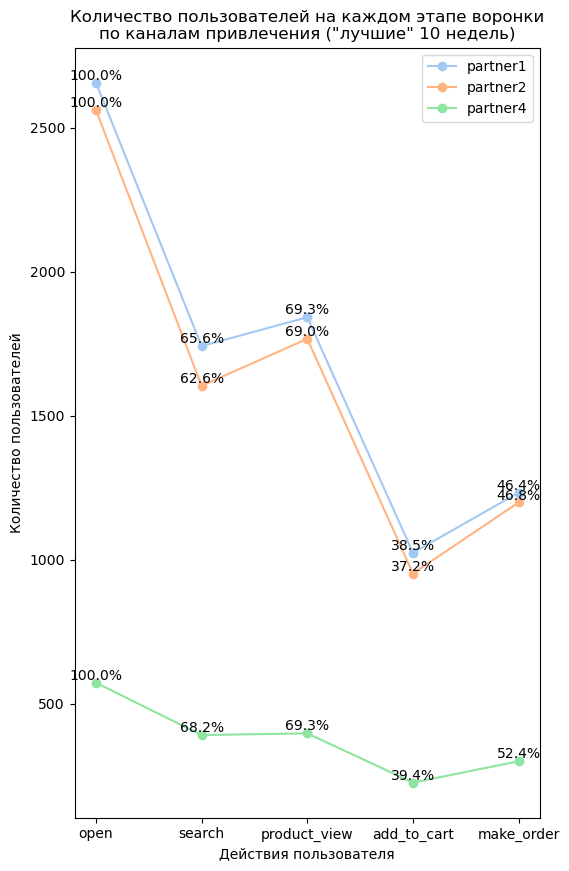

In [36]:
# Определение порядка действий пользователя
funnel_order = ['open', 'search', 'product_view', 'add_to_cart', 'make_order']

# Подсчет количества пользователей на каждом этапе воронки по каналам привлечения
funnel_counts = best_10_weeks_data.groupby(['channel', 'action'])['cid'].nunique().reset_index()

# Установка порядка действий воронки
funnel_counts['action'] = pd.Categorical(funnel_counts['action'], categories=funnel_order, ordered=True)

# Сортировка по порядку действий
funnel_counts = funnel_counts.sort_values(['channel', 'action'])

# Расчет доли пользователей для каждого этапа и каждого канала
total_users_by_channel = best_10_weeks_data.groupby('channel')['cid'].nunique()
funnel_counts['share'] = funnel_counts.groupby('channel')['cid'].transform(lambda x: x / total_users_by_channel[x.name])

# Построение линейного графика
plt.figure(figsize=(6, 10))

for channel in funnel_counts['channel'].unique():
    channel_data = funnel_counts[funnel_counts['channel'] == channel]
    plt.plot(funnel_order, channel_data['cid'], marker='o', label=channel)
    
    # Добавление доли от всех пользователей над каждой линией
    for x, y, share in zip(funnel_order, channel_data['cid'], channel_data['share']):
        plt.text(x, y, f"{share:.1%}", ha='center', va='bottom')

# Настройка осей и легенды
plt.xlabel('Действия пользователя')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей на каждом этапе воронки\nпо каналам привлечения ("лучшие" 10 недель)')
plt.legend()

plt.show()

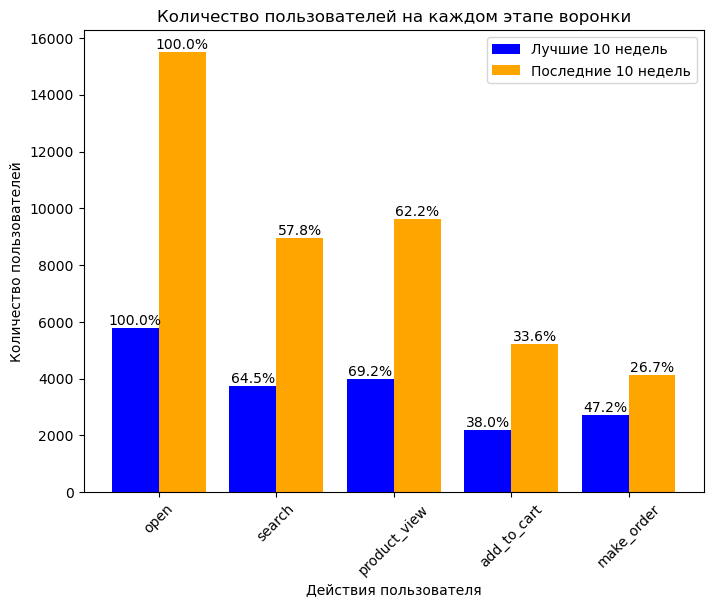

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Определение порядка действий пользователя
funnel_order = ['open', 'search', 'product_view', 'add_to_cart', 'make_order']

# Подсчет количества пользователей на каждом этапе воронки
funnel_counts_best = best_10_weeks_data.groupby('action')['cid'].nunique().reset_index()
funnel_counts_last = last_10_weeks_data.groupby('action')['cid'].nunique().reset_index()

# Установка порядка действий воронки
funnel_counts_best['action'] = pd.Categorical(funnel_counts_best['action'], categories=funnel_order, ordered=True)
funnel_counts_last['action'] = pd.Categorical(funnel_counts_last['action'], categories=funnel_order, ordered=True)

# Сортировка по порядку действий
funnel_counts_best = funnel_counts_best.sort_values('action')
funnel_counts_last = funnel_counts_last.sort_values('action')

# Расчет доли пользователей для каждого этапа
total_users_best = best_10_weeks_data['cid'].nunique()
total_users_last = last_10_weeks_data['cid'].nunique()
funnel_counts_best['share'] = funnel_counts_best['cid'] / total_users_best
funnel_counts_last['share'] = funnel_counts_last['cid'] / total_users_last

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 6))

# Данные для первого периода
x_best = range(len(funnel_counts_best))
x_last = [x + 0.4 for x in x_best]

# Построение столбцов для первого периода
plt.bar(x_best, funnel_counts_best['cid'], color='blue', width=0.4, label='Лучшие 10 недель')

# Построение столбцов для второго периода
plt.bar(x_last, funnel_counts_last['cid'], color='orange', width=0.4, label='Последние 10 недель')

plt.xlabel('Действия пользователя')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей на каждом этапе воронки')

# Подписи оси X
plt.xticks([x + 0.2 for x in x_best], funnel_counts_best['action'], rotation=45)

# Добавление доли от всех пользователей над каждым столбиком для первого периода
for i, bar in enumerate(plt.bar(x_best, funnel_counts_best['cid'], color='blue', width=0.4)):
    height = bar.get_height()
    percentage = height / total_users_best * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{percentage:.1f}%", ha='center', va='bottom')

# Добавление доли от всех пользователей над каждым столбиком для второго периода
for i, bar in enumerate(plt.bar(x_last, funnel_counts_last['cid'], color='orange', width=0.4)):
    height = bar.get_height()
    percentage = height / total_users_last * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{percentage:.1f}%", ha='center', va='bottom')

# Добавление легенды
plt.legend()

plt.show()


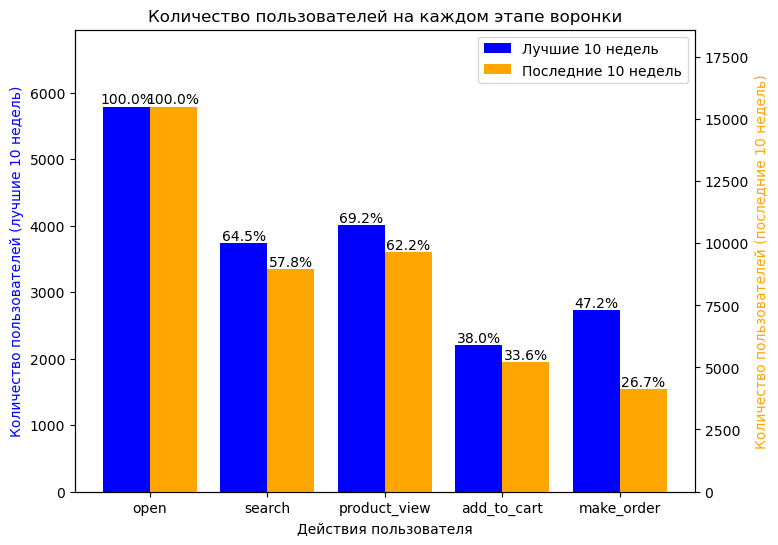

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Определение порядка действий пользователя
funnel_order = ['open', 'search', 'product_view', 'add_to_cart', 'make_order']

# Подсчет количества пользователей на каждом этапе воронки
funnel_counts_best = best_10_weeks_data.groupby('action')['cid'].nunique().reset_index()
funnel_counts_last = last_10_weeks_data.groupby('action')['cid'].nunique().reset_index()

# Установка порядка действий воронки
funnel_counts_best['action'] = pd.Categorical(funnel_counts_best['action'], categories=funnel_order, ordered=True)
funnel_counts_last['action'] = pd.Categorical(funnel_counts_last['action'], categories=funnel_order, ordered=True)

# Сортировка по порядку действий
funnel_counts_best = funnel_counts_best.sort_values('action')
funnel_counts_last = funnel_counts_last.sort_values('action')

# Расчет доли пользователей для каждого этапа
total_users_best = best_10_weeks_data['cid'].nunique()
total_users_last = last_10_weeks_data['cid'].nunique()
funnel_counts_best['share'] = funnel_counts_best['cid'] / total_users_best
funnel_counts_last['share'] = funnel_counts_last['cid'] / total_users_last

# Построение столбчатой диаграммы
fig, ax1 = plt.subplots(figsize=(8, 6))

# Данные для первого периода
x_best = range(len(funnel_counts_best))

# Построение столбцов для первого периода
ax1.bar(x_best, funnel_counts_best['cid'], color='blue', width=0.4, label='Лучшие 10 недель')

ax1.set_xlabel('Действия пользователя')
ax1.set_ylabel('Количество пользователей')
ax1.set_title('Количество пользователей на каждом этапе воронки')

# Добавление доли от всех пользователей над каждым столбиком для первого периода
for i, bar in enumerate(ax1.bar(x_best, funnel_counts_best['cid'], color='blue', width=0.4)):
    height = bar.get_height()
    percentage = height / total_users_best * 100
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f"{percentage:.1f}%", ha='center', va='bottom')

# Создание второй оси
ax2 = ax1.twinx()

# Данные для второго периода
x_last = [x + 0.4 for x in x_best]

# Построение столбцов для второго периода
ax2.bar(x_last, funnel_counts_last['cid'], color='orange', width=0.4, label='Последние 10 недель')

# Добавление доли от всех пользователей над каждым столбиком для второго периода
for i, bar in enumerate(ax2.bar(x_last, funnel_counts_last['cid'], color='orange', width=0.4)):
    height = bar.get_height()
    percentage = height / total_users_last * 100
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f"{percentage:.1f}%", ha='center', va='bottom')

# Установка осей для первого периода
ax1.set_xticks([x + 0.2 for x in x_best])
ax1.set_xticklabels(funnel_counts_best['action'])

# Установка осей для второго периода
ax2.set_xticks([x + 0.2 for x in x_best])
ax2.set_xticklabels(funnel_counts_best['action'])

ax1.set_ylim(0, max(funnel_counts_best['cid']) * 1.2)
ax2.set_ylim(0, max(funnel_counts_last['cid']) * 1.2)

# Установка меток осей
ax1.set_ylabel('Количество пользователей (лучшие 10 недель)', color='blue')
ax2.set_ylabel('Количество пользователей (последние 10 недель)', color='orange')

# Добавление легенды
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()


In [41]:
# Проверка: не была ли введена "плата за вход"

# Фильтрация данных по периоду с 1 сентября 2017
filtered_data = data[data['date_time'].dt.date >= pd.to_datetime('2017-09-01')]

purchase_10 = filtered_data[filtered_data['sum'] == 10]['cid'].unique()
other_purchases = filtered_data[filtered_data['sum'] > 10]['cid'].unique()

# Выявление клиентов, удовлетворяющих условию
no_purchase_10 = [cid for cid in other_purchases if cid not in purchase_10]

num_clients = len(no_purchase_10)

print(f"Количество клиентов, которые не совершали покупку за 10, но совершали другие покупки: {num_clients}")
print(f"Количество клиентов, которые совершали покупку за 10: {len(purchase_10)}")



c:\Users\Maria\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


Количество клиентов, которые не совершали покупку за 10, но совершали другие покупки: 4435
Количество клиентов, которые совершали покупку за 10: 3624
